In [1]:
# !pip uninstall pandas
# !pip install pandas==1.3.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Titanic_Dataset/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
cols_dropped = ['PassengerId', 'Name', 'Ticket', 'Cabin']

In [7]:
data = data.drop(cols_dropped, axis = 1)

In [8]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_enc = LabelEncoder()

data['Sex'] = label_enc.fit_transform(data['Sex'])

In [11]:
data['Embarked'] = label_enc.fit_transform(data['Embarked'])

In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [13]:
data = data.fillna(data['Age'].mean())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [15]:
input_col = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
output = ['Survived']

X_data = data[input_col]
Y_data = data[output]

In [16]:
X_data.shape, Y_data.shape

((891, 7), (891, 1))

In [17]:
def entropy(col):
    favour = np.unique(col, return_counts = True)
    N = col.shape[0]
    ent_py = 0
    for i in favour[1]:
        prob = i/N
        ent_py += -1 * (prob * np.log2(prob))
    
    return ent_py

In [18]:
a = np.array([[1,2], 
              [3,4]])
print(a.shape, a[0], a[0].shape)

(2, 2) [1 2] (2,)


In [19]:
def divide_data(X_data, feat, value):
    X_right = pd.DataFrame([], columns = X_data.columns)
    X_left = pd.DataFrame([], columns = X_data.columns)
#     X_right = []
#     X_left = []
    
    for i in range(X_data.shape[0]):
        val = X_data[feat].loc[i]
        
        if val >= value:
#             X_right.append(X_data.loc[i])
#             X_right = X_right.append(X_data.loc[i])
            X_right = pd.concat([X_right, X_data.iloc[i: i + 1]])
        else:
#             X_left.append(X_data.loc[i])
#             X_left = X_left.append(X_data.loc[i])
            X_left = pd.concat([X_left, X_data.iloc[i: i + 1]])
        
#     return pd.DataFrame(X_left, columns=X_data.columns), pd.DataFrame(X_right, columns = X_data.columns)
    return X_left, X_right

In [20]:
left, right = divide_data(data[:10], 'Sex', 0.5)

In [21]:
print(left.shape, right.shape)

(5, 8) (5, 8)


In [22]:
print(left)
print(right)

  Survived Pclass Sex   Age SibSp Parch     Fare Embarked
1        1      1   0  38.0     1     0  71.2833        0
2        1      3   0  26.0     0     0   7.9250        2
3        1      1   0  35.0     1     0  53.1000        2
8        1      3   0  27.0     0     2  11.1333        2
9        1      2   0  14.0     1     0  30.0708        0
  Survived Pclass Sex        Age SibSp Parch     Fare Embarked
0        0      3   1  22.000000     1     0   7.2500        2
4        0      3   1  35.000000     0     0   8.0500        2
5        0      3   1  29.699118     0     0   8.4583        1
6        0      1   1  54.000000     0     0  51.8625        2
7        0      3   1   2.000000     3     1  21.0750        2


In [23]:
def info_gain(X_data, feat, value):
    left, right = divide_data(X_data, feat, value)
    
    prob_l = left.shape[0]/X_data.shape[0]
    prob_r = right.shape[0]/X_data.shape[0]
    
    i_gain = entropy(X_data.Survived) - (prob_l * entropy(left.Survived) + 
                                         prob_r * entropy(right.Survived))
    return i_gain

In [24]:
for i in X_data.columns:
    print(i, info_gain(data, i, data[i].mean()))

Pclass 0.07579362743608165
Sex 0.2176601066606142
Age 0.001158644038169343
SibSp 0.009584541813400071
Parch 0.015380754493137694
Fare 0.042140692838995464
Embarked 0.015909401384176403


In [25]:
class Decision_Tree:
    def __init__(self, depth = 0, max_depth = 7):
        self.left = None
        self.right = None
        self.feat = None
        self.value = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
    
    def train(self, X_train):
        f = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
        i_gain = []
        
        for i in f:
            i_gain.append(info_gain(X_train, i, X_train[i].mean()))
            
        self.feat = f[np.argmax(i_gain)]
        self.value = X_train[self.feat].mean()
        
        data_left, data_right = divide_data(X_train, self.feat, self.value)
        data_left = data_left.reset_index(drop = True)
        data_right = data_right.reset_index(drop = True)
        print('Making Tree with Feature:', self.feat, 'Depth:', self.depth)
        
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                self.target = 'Survived'
            else:
                self.target = 'Not Survived'
            return 'Done Training'
        
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = 'Survived'
            else:
                self.target = 'Not Survived'
            return 'Done Training'
        
        self.left = Decision_Tree(depth = self.depth + 1)
        self.left.train(data_left)
        
        self.right = Decision_Tree(depth = self.depth + 1)
        self.right.train(data_right)
        
        if X_train.Survived.mean() >= 0.5:
            self.target = 'Survived'
        else:
            self.target = 'Not Survived'
        return 'Done Training'
    
    def predict(self, test):
        if test[self.feat] >= self.value:
            if self.right is None:
                return (self.target)
            return self.right.predict(test)
        else:
            if self.left is None:
                return (self.target)
            return self.left.predict(test)

In [26]:
split = 0.8

train_X = data[:int(split * data.shape[0])]
test_X = data[int(split * data.shape[0]):]
test_X = test_X.reset_index(drop = True)

In [27]:
dt = Decision_Tree(max_depth = 10)
dt.train(train_X)

Making Tree with Feature: Sex Depth: 0
Making Tree with Feature: Pclass Depth: 1
Making Tree with Feature: Embarked Depth: 2
Making Tree with Feature: Age Depth: 3
Making Tree with Feature: Pclass Depth: 4
Making Tree with Feature: Pclass Depth: 5
Making Tree with Feature: Pclass Depth: 5
Making Tree with Feature: Age Depth: 4
Making Tree with Feature: Pclass Depth: 5
Making Tree with Feature: SibSp Depth: 5
Making Tree with Feature: Fare Depth: 6
Making Tree with Feature: Pclass Depth: 7
Making Tree with Feature: Pclass Depth: 7
Making Tree with Feature: Pclass Depth: 6
Making Tree with Feature: Age Depth: 3
Making Tree with Feature: SibSp Depth: 4
Making Tree with Feature: Age Depth: 5
Making Tree with Feature: Pclass Depth: 6
Making Tree with Feature: Pclass Depth: 7
Making Tree with Feature: Pclass Depth: 7
Making Tree with Feature: Age Depth: 6
Making Tree with Feature: Age Depth: 7
Making Tree with Feature: Pclass Depth: 7
Making Tree with Feature: SibSp Depth: 5
Making Tree with

'Done Training'

In [28]:
print(dt.feat)
print(dt.left.feat)
print(dt.right.feat)
print(dt.left.left.feat)
print(dt.left.right.feat)

Sex
Pclass
Fare
Embarked
Embarked


In [29]:
pred = []

for i in range(test_X.shape[0]):
    output = dt.predict(test_X.loc[i])
    if output == 'Not Survived':
        pred.append(0)
    else:
        pred.append(1)

In [30]:
pred

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0]

In [31]:
label = test_X['Survived']

In [32]:
corr = 0
for i in range(label.shape[0]):
    print(label[i], pred[i])
    if label[i] == pred[i]:
        corr+=1
print(corr/label.shape[0])

1 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
1 0
0 0
1 1
1 1
0 0
0 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 1
0 1
1 1
0 0
1 0
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 0
1 1
0 0
1 1
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 0
1 1
0 0
0 0
1 1
0 0
1 1
1 1
1 1
0 1
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 0
0 0
0 1
0 0
1 1
1 1
1 1
1 0
0 0
0 0
0 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
1 1
1 0
0 0
1 1
0 0
0 0
0 1
1 0
1 0
1 1
1 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 1
1 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 1
1 1
0 0
0 0
0 1
1 1
0 1
1 0
1 1
1 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 1
0 0
1 1
0 0
1 1
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 0
1 1
0 0
0 0
0 0
0 0
0 1
0 0
1 1
0 1
1 1
0 0
0.8324022346368715


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
d_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [35]:
d_tree.fit(X_data, Y_data)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [36]:
d_tree.predict(test_X[input_col])

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [37]:
d_tree.score(test_X[input_col], test_X['Survived'])

0.9162011173184358

In [38]:
DecisionTreeClassifier?

In [39]:
from sklearn import tree as dt
import matplotlib.pyplot as plt

In [40]:
# fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (200, 200))
# dt.plot_tree(d_tree, filled=True)
# plt.show()
# fig.savefig('tree.png')

# Random Forrest

In [42]:
label = data['Survived']
data.drop(['Survived'], axis = 1, inplace=True)

In [45]:
data = data.values
label = label.values

In [47]:
split = 0.8
X_train = data[:int(split * data.shape[0]), :]
X_test = data[int(split * data.shape[0]):, :]
Y_train = label[:int(split * data.shape[0])]
Y_test = label[int(split * data.shape[0]):]

In [48]:
print(X_test.shape, Y_test.shape, X_train.shape, Y_train.shape)

(179, 7) (179,) (712, 7) (712,)


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 10)

In [57]:
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10)

In [58]:
rf.score(X_test, Y_test)

0.8100558659217877

In [104]:
acc_score = []

for i in range(100):
    rf = RandomForestClassifier(n_estimators = i+1, criterion = 'entropy', max_depth = 5)
    rf.fit(X_train, Y_train)
    acc_score.append(rf.score(X_test, Y_test))
    print(f'On: {i}', end = '\r')

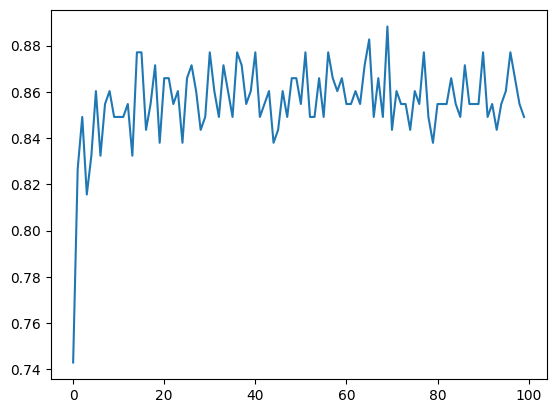

In [105]:
plt.plot(acc_score)

In [106]:
np.argmax(acc_score)

69

In [107]:
rf = RandomForestClassifier(n_estimators = 70, criterion = 'entropy', max_depth = 10)
rf.fit(X_train, Y_train)
print(rf.score(X_test, Y_test))

0.8659217877094972


In [108]:
rf = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', max_depth = 10)
rf.fit(X_train, Y_train)
print(rf.score(X_test, Y_test))

0.8268156424581006


In [110]:
import seaborn as sns

<Axes: >

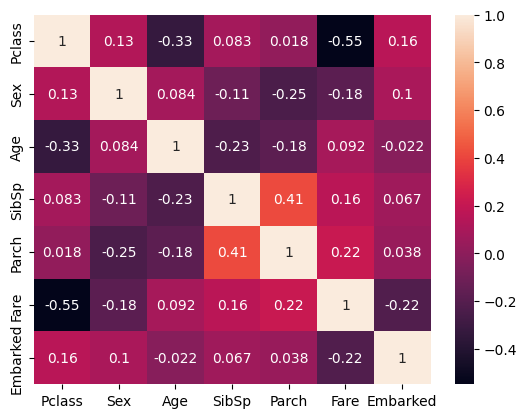

In [112]:
sns.heatmap(X_data.corr(), annot=True)